**Part (1): Neural Netwrok from Scratch on Iris Dataset**

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot
from keras.datasets import mnist
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
iris = pd.read_csv('/content/drive/My Drive/Datasets/Iris.csv')

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Dropping Null Values
data = iris.drop_duplicates(subset ="Species",)
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
50    51            7.0           3.2            4.7           1.4   
100  101            6.3           3.3            6.0           2.5   

             Species  
0        Iris-setosa  
50   Iris-versicolor  
100   Iris-virginica  


In [ ]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = np.array(X)
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [ ]:
Y = iris.Species
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [ ]:
def NeuralNetwork(X_train, Y_train, X_val=None, Y_val=None, epochs=10, nodes=[], lr=0.15):
    hidden_layers = len(nodes) - 1
    weights = InitializeWeights(nodes)

    for epoch in range(1, epochs+1):
        weights = Train(X_train, Y_train, lr, weights)

        if(epoch % 20 == 0):
            print("Epoch {}".format(epoch))
            print("Training Accuracy:{}".format(Accuracy(X_train, Y_train, weights)))
            #if X_val.any():
            #    print("Validation Accuracy:{}".format(Accuracy(X_val, Y_val, weights)))
            
    return weights

def InitializeWeights(nodes):
  layers, weights = len(nodes), []

  for i in range(1, layers):
      w = [[np.random.uniform(-1, 1) for k in range(nodes[i-1] + 1)]
            for j in range(nodes[i])]
      weights.append(np.matrix(w))

  return weights

def ForwardPropagation(x, weights, layers):
  activations, layer_input = [x], x
  for j in range(layers):
      activation = Sigmoid(np.dot(layer_input, weights[j].T))
      activations.append(activation)
      layer_input = np.append(1, activation) # Augment with bias
  
  return activations

def BackPropagation(y, activations, weights, layers):
  outputFinal = activations[-1]
  error = np.matrix(y - outputFinal) # Error at output
  
  for j in range(layers, 0, -1):
      currActivation = activations[j]
      
      if(j > 1):

          # Augment previous activation
          prevActivation = np.append(1, activations[j-1])
      else:
          # First hidden layer, prevActivation is input (without bias)
          prevActivation = activations[0]
      
      delta = np.multiply(error, SigmoidDerivative(currActivation))
      weights[j-1] += lr * np.multiply(delta.T, prevActivation)

      w = np.delete(weights[j-1], [0], axis=1) # Remove bias from weights
      error = np.dot(delta, w) # Calculate error for current layer
  
  return weights


def Train(X, Y, lr, weights):
  layers = len(weights)
  for i in range(len(X)):
      x, y = X[i], Y[i]
      x = np.matrix(np.append(1, x)) # Augment feature vector
      
      activations = ForwardPropagation(x, weights, layers)
      weights = BackPropagation(y, activations, weights, layers)

  return weights


def Sigmoid(x):
  return 1 / (1 + np.exp(-x))

def SigmoidDerivative(x):
    return np.multiply(x, 1-x)


def Predict(item, weights):
  layers = len(weights)
  item = np.append(1, item) # Augment feature vector
  
  ##_Forward Propagation_##
  activations = ForwardPropagation(item, weights, layers)
  
  outputFinal = activations[-1].A1
  index = FindMaxActivation(outputFinal)

  # Initialize prediction vector to zeros
  y = [0 for i in range(len(outputFinal))]
  y[index] = 1  # Set guessed class to 1

  return y # Return prediction vector

def FindMaxActivation(output):
    """Find max activation in output"""
    m, index = output[0], 0
    for i in range(1, len(output)):
        if(output[i] > m):
            m, index = output[i], i
    return index

def Accuracy(X, Y, weights):
  """Run set through network, find overall accuracy"""
  correct = 0

  for i in range(len(X)):
    x, y = X[i], list(Y[i])
    guess = Predict(x, weights)

    if(y == guess):
        # Guessed correctly
        correct += 1

  return correct / len(X)

  

In [ ]:
f = len(X[0]) # Number of features
o = len(Y[0]) # Number of outputs / classes

layers = [f, 20, 30, o] # Number of nodes in layers
lr, epochs = 0.1, 100

weights = NeuralNetwork(X_train, Y_train, epochs=epochs, nodes=layers, lr=lr);

Epoch 20
Training Accuracy:0.9763779527559056
Epoch 40
Training Accuracy:0.968503937007874
Epoch 60
Training Accuracy:0.905511811023622
Epoch 80
Training Accuracy:0.905511811023622
Epoch 100
Training Accuracy:0.9212598425196851


**Part (2): Neural Netwrok from Scratch on Mnist Dataset**

In [ ]:
import numpy as np
import time
import matplotlib.pyplot
%matplotlib inline

In [ ]:
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()
     

In [ ]:
convert('/content/drive/My Drive/Datasets/train-images.idx3-ubyte', '/content/drive/My Drive/Datasets/train-labels.idx1-ubyte',
        '/content/drive/My Drive/Datasets/mnist_train.csv', 60000)
convert("/content/drive/My Drive/Datasets/t10k-images.idx3-ubyte", "/content/drive/My Drive/Datasets/t10k-labels.idx1-ubyte",
        "/content/drive/My Drive/Datasets/mnist_test.csv", 10000)

In [ ]:
# open the CSV file and read its contents into a list
train_file = open("/content/drive/My Drive/Datasets/mnist_train.csv", 'r')
train_list = train_file.readlines()
train_file.close()

In [ ]:
# check the number of data records (examples)
len(train_list)
     
60000

60000

In [ ]:
# show a dataset record
# the first number is the label, the rest are pixel colour values (greyscale 0-255)
train_list[100]
     

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,18,46,136,136,244,255,241,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,94,163,253,253,253,253,238,218,204,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,253,253,253,253,237,200,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,246,253,247,108,65,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,207,253,253,230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,157,253,253,125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,253,250,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,253,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,253,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,253,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

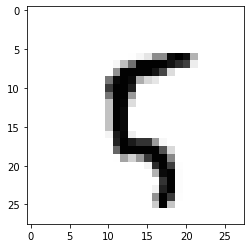

In [ ]:
# take the data from a record, rearrange it into a 28*28 array and plot it as an image
all_values = train_list[100].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [ ]:
# scale input to range 0.01 to 1.00
scaled_input_train = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
# print(scaled_input)

In [ ]:
# open the CSV file and read its contents into a list
test_file = open("/content/drive/My Drive/Datasets/mnist_test.csv", 'r')
test_list = test_file.readlines()
test_file.close()

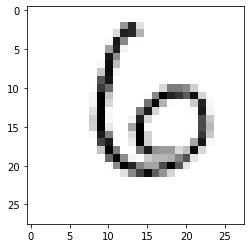

In [ ]:
# take the data from a record, rearrange it into a 28*28 array and plot it as an image
all_values = test_list[100].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
     


In [ ]:
# scale input to range 0.01 to 1.00
scaled_input_train = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
# print(scaled_input)

In [ ]:

class NN:
  def __init__(self, sizes, epochs, lr):
    self.sizes = sizes
    self.epochs = epochs
    self.lr = lr

    # number of nodes in each layer
    input_layer=self.sizes[0]
    hidden_1=self.sizes[1]
    hidden_2=self.sizes[2]
    output_layer=self.sizes[3]

    self.params = {
        'W1':np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
        'W2':np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
        'W3':np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
    }
  def sigmoid(self, x, derivative=False):
      if derivative:
          return (np.exp(-x))/((np.exp(-x)+1)**2)
      return 1/(1 + np.exp(-x))

  def softmax(self, x, derivative=False):
      # Numerically stable with large exponentials
      exps = np.exp(x - x.max())
      if derivative:
          return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
      return exps / np.sum(exps, axis=0)
  def forward_pass(self, x_train):
      params = self.params

      # input layer activations becomes sample
      params['A0'] = x_train

      # input layer to hidden layer 1
      params['Z1'] = np.dot(params["W1"], params['A0'])
      params['A1'] = self.sigmoid(params['Z1'])

      # hidden layer 1 to hidden layer 2
      params['Z2'] = np.dot(params["W2"], params['A1'])
      params['A2'] = self.sigmoid(params['Z2'])

      # hidden layer 2 to output layer
      params['Z3'] = np.dot(params["W3"], params['A2'])
      params['A3'] = self.softmax(params['Z3'])

      return params['A3']

  def backward_pass(self, y_train, output):
      '''
          This is the backpropagation algorithm, for calculating the updates
          of the neural network's parameters.

          Note: There is a stability issue that causes warnings. This is 
                caused  by the dot and multiply operations on the huge arrays.
                
                RuntimeWarning: invalid value encountered in true_divide
                RuntimeWarning: overflow encountered in exp
                RuntimeWarning: overflow encountered in square
      '''
      params = self.params
      change_w = {}

      # Calculate W3 update
      error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
      change_w['W3'] = np.outer(error, params['A2'])

      # Calculate W2 update
      error = np.dot(params['W3'].T, error) * self.sigmoid(params['Z2'], derivative=True)
      change_w['W2'] = np.outer(error, params['A1'])

      # Calculate W1 update
      error = np.dot(params['W2'].T, error) * self.sigmoid(params['Z1'], derivative=True)
      change_w['W1'] = np.outer(error, params['A0'])

      return change_w

  def update_network_parameters(self, changes_to_w):
      '''
          Update network parameters according to update rule from
          Stochastic Gradient Descent.

          θ = θ - η * ∇J(x, y), 
              theta θ:            a network parameter (e.g. a weight w)
              eta η:              the learning rate
              gradient ∇J(x, y):  the gradient of the objective function,
                                  i.e. the change for a specific theta θ
      '''
      
      for key, value in changes_to_w.items():
          self.params[key] -= self.lr * value

  def compute_accuracy(self, test_data, output_nodes):
      '''
          This function does a forward pass of x, then checks if the indices
          of the maximum value in the output equals the indices in the label
          y. Then it sums over each prediction and calculates the accuracy.
      '''
      predictions = []

      for x in train_list:
          all_values = x.split(',')
          # scale and shift the inputs
          inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
          # create the target output values (all 0.01, except the desired label which is 0.99)
          targets = np.zeros(output_nodes) + 0.01
          # all_values[0] is the target label for this record
          targets[int(all_values[0])] = 0.99
          output = self.forward_pass(inputs)
          pred = np.argmax(output)
          predictions.append(pred == np.argmax(targets))
      
      return np.mean(predictions)

  def train(self, train_list, test_list, output_nodes):
      start_time = time.time()
      for iteration in range(self.epochs):
          for x in train_list:
              all_values = x.split(',')
              # scale and shift the inputs
              inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
              # create the target output values (all 0.01, except the desired label which is 0.99)
              targets = np.zeros(output_nodes) + 0.01
              # all_values[0] is the target label for this record
              targets[int(all_values[0])] = 0.99
              output = self.forward_pass(inputs)
              changes_to_w = self.backward_pass(targets, output)
              self.update_network_parameters(changes_to_w)
          
          accuracy = self.compute_accuracy(test_list, output_nodes)
          print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
              iteration+1, time.time() - start_time, accuracy * 100
          ))

In [ ]:
dnn = NN(sizes=[784, 128, 64, 10], epochs=10, lr=0.25)
dnn.train(train_list, test_list, 10)

Epoch: 1, Time Spent: 53.86s, Accuracy: 89.71%
Epoch: 2, Time Spent: 109.67s, Accuracy: 93.12%
Epoch: 3, Time Spent: 163.36s, Accuracy: 94.63%
Epoch: 4, Time Spent: 216.97s, Accuracy: 95.47%
Epoch: 5, Time Spent: 271.78s, Accuracy: 96.05%
Epoch: 6, Time Spent: 327.60s, Accuracy: 96.51%
Epoch: 7, Time Spent: 380.79s, Accuracy: 96.98%
Epoch: 8, Time Spent: 434.03s, Accuracy: 97.01%
Epoch: 9, Time Spent: 487.39s, Accuracy: 97.18%
Epoch: 10, Time Spent: 551.88s, Accuracy: 97.31%
